Gradient Boosting Classifier - Baseline Performance
Accuracy: 0.9427
Precision: 0.7600
Recall: 0.5644
F1 Score: 0.6477


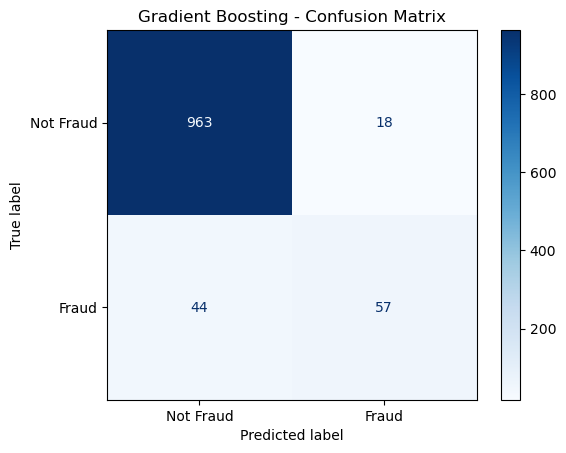

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (optional for tree-based models, but can help in some cases)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Make predictions
y_pred = gbc.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Gradient Boosting Classifier - Baseline Performance")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()


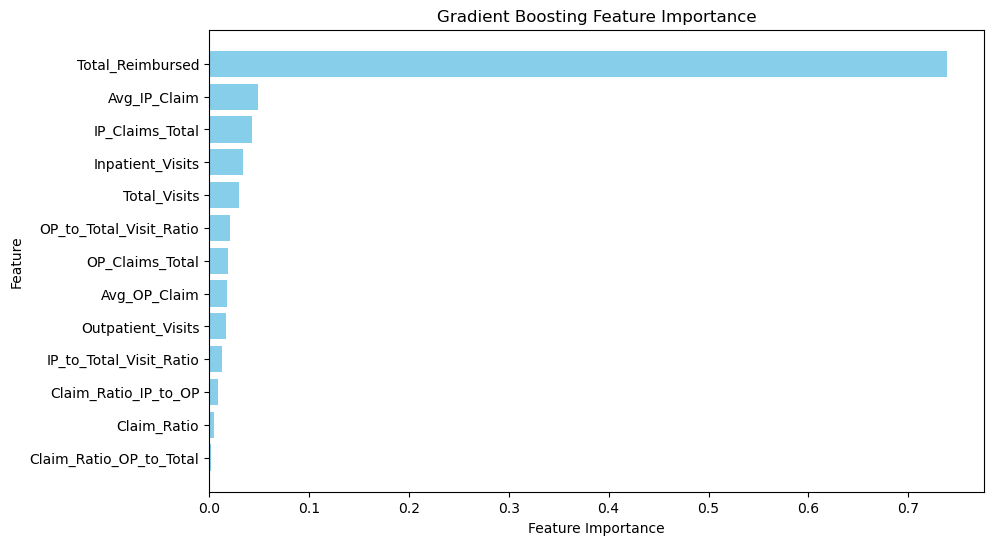

                    Feature  Importance
2          Total_Reimbursed    0.738787
8              Avg_IP_Claim    0.049402
0           IP_Claims_Total    0.043428
4          Inpatient_Visits    0.033823
10             Total_Visits    0.029571
12  OP_to_Total_Visit_Ratio    0.020633
1           OP_Claims_Total    0.019424
9              Avg_OP_Claim    0.017957
5         Outpatient_Visits    0.017037
11  IP_to_Total_Visit_Ratio    0.013043
6      Claim_Ratio_IP_to_OP    0.009115
3               Claim_Ratio    0.005306
7   Claim_Ratio_OP_to_Total    0.002474


In [19]:
# Get feature importance
feature_importance = gbc.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort by importance (highest first)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Gradient Boosting Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

# Display top features
print(feature_importance_df.head(15))  # Print top 15 features


In [21]:
import seaborn as sns


After Feature Selection:
Accuracy: 0.9418
Precision: 0.7500
Recall: 0.5644
F1 Score: 0.6441


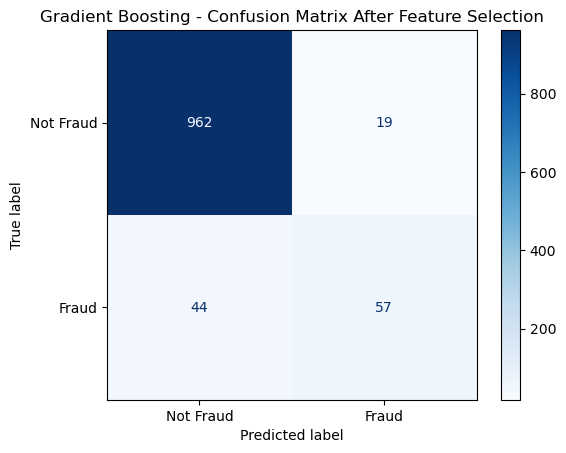

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_2688\3735213673.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')


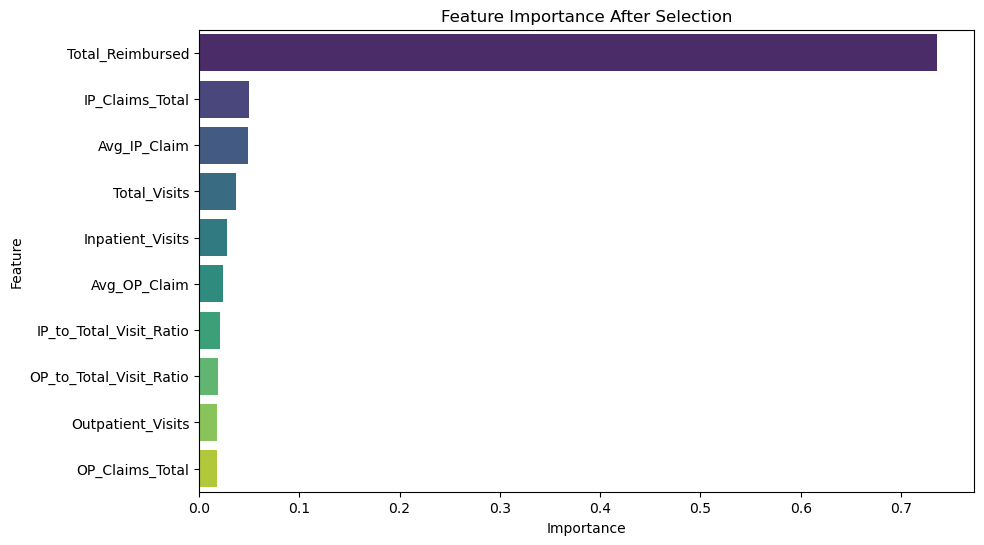

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features and target
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Remove least important features
least_important_features = ['Claim_Ratio', 'Claim_Ratio_IP_to_OP', 'Claim_Ratio_OP_to_Total']
X = X.drop(columns=least_important_features)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("After Feature Selection:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Gradient Boosting - Confusion Matrix After Feature Selection")
plt.show()

# Feature Importance Visualization
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': gb_clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')
plt.title("Feature Importance After Selection")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Threshold: 0.5
Accuracy: 0.9427
Precision: 0.7468
Recall: 0.5842
F1 Score: 0.6556


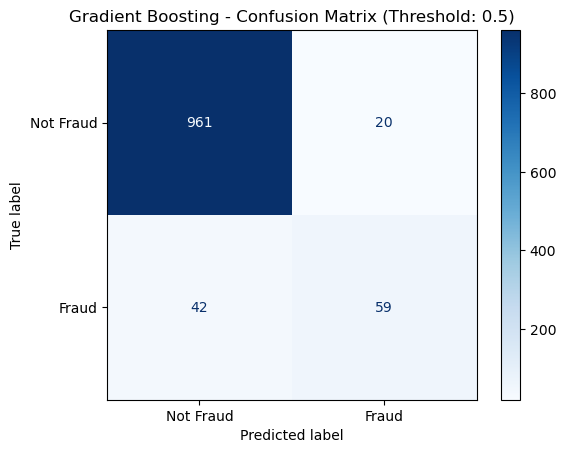

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (for consistent scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an optimized Gradient Boosting model
gbc = GradientBoostingClassifier(
    n_estimators=200,  # More trees for better learning
    learning_rate=0.05,  # Lower LR for better generalization
    max_depth=4,  # Slightly deeper trees
    min_samples_split=5,  # Avoid small splits
    min_samples_leaf=2,  # Prevent overfitting
    subsample=0.8,  # Introduce randomness
    random_state=42
)
gbc.fit(X_train, y_train)

# Predict probabilities
y_proba = gbc.predict_proba(X_test)[:, 1]

# Apply new threshold (experiment with 0.65, 0.7, etc.)
threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Threshold: {threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Gradient Boosting - Confusion Matrix (Threshold: {threshold})")
plt.show()


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Accuracy: 0.9399
Precision: 0.7368
Recall: 0.5545
F1 Score: 0.6328


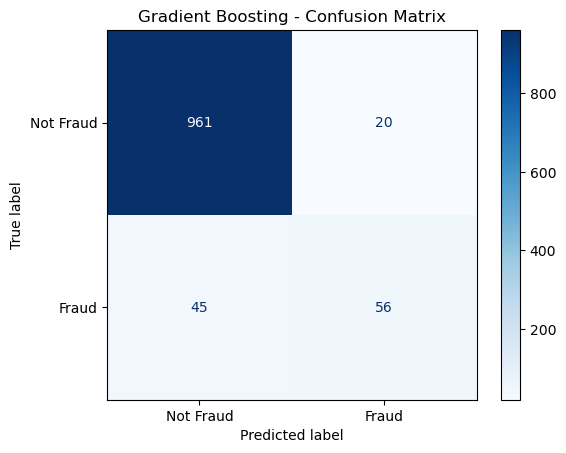

In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Define features and target
X = df.drop(columns=['Provider', 'PotentialFraud'])
y = df['PotentialFraud']

# Split data (for final evaluation after cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],  # Limits tree depth to prevent overfitting
    'subsample': [0.7, 0.9, 1.0],  # Fraction of samples used per tree
}

# Define model
gbm = GradientBoostingClassifier(random_state=42)

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run GridSearchCV
grid_search = GridSearchCV(gbm, param_grid, scoring='recall', cv=cv, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()


Threshold: 0.69
Accuracy: 0.9381
Precision: 0.6809
Recall: 0.6337
F1 Score: 0.6564


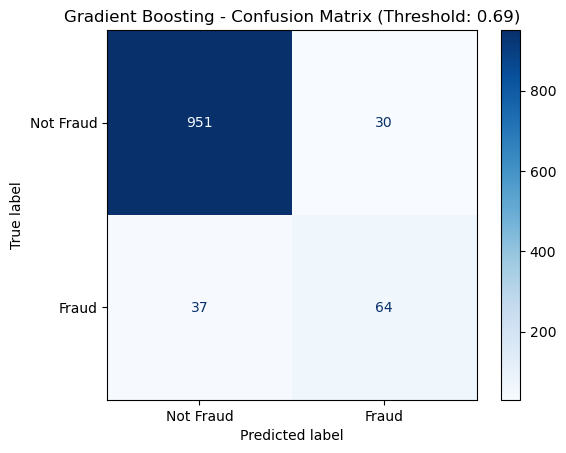

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final_provider_dataset.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for some models, but not strictly required for tree-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Predict probabilities
y_proba = gbc.predict_proba(X_test)[:, 1]

# Apply new threshold (0.69)
y_pred = (y_proba >= 0.4).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Threshold: 0.69")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Gradient Boosting - Confusion Matrix (Threshold: 0.69)")
plt.show()


Threshold: 0.69
Accuracy: 0.9353
Precision: 0.6632
Recall: 0.6238
F1 Score: 0.6429


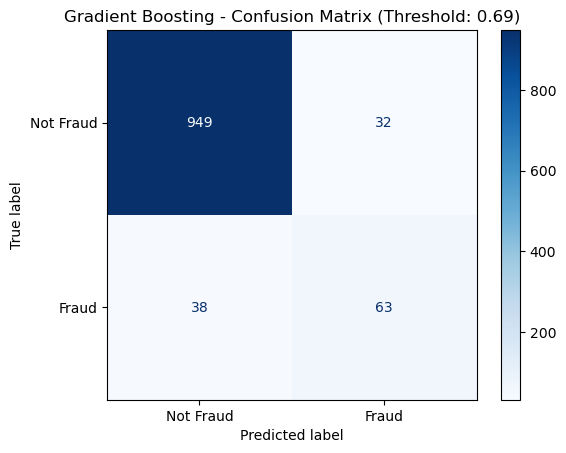

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the enhanced dataset
df = pd.read_csv('final_provider_dataset_enhanced.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for some models, but not strictly required for tree-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Predict probabilities
y_proba = gbc.predict_proba(X_test)[:, 1]

# Apply new threshold (0.69)
y_pred = (y_proba >= 0.4).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Threshold: 0.69")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Gradient Boosting - Confusion Matrix (Threshold: 0.69)")
plt.show()


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the old dataset
df_old = pd.read_csv('final_provider_dataset.csv')

# Load the enhanced dataset
df_new = pd.read_csv('final_provider_dataset_enhanced.csv')

# Function to train and evaluate a model
def evaluate_model(df, dataset_name):
    df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})
    df = df.drop(columns=['Provider'])  # Drop non-numeric column

    X = df.drop(columns=['PotentialFraud'])
    y = df['PotentialFraud']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    gbc = GradientBoostingClassifier(random_state=42)
    gbc.fit(X_train, y_train)

    y_proba = gbc.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= 0.4).astype(int)  # Threshold = 0.4

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"🔹 **{dataset_name} Performance**")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 50)

# Run evaluations
evaluate_model(df_old, "Old Dataset")
evaluate_model(df_new, "Enhanced Dataset")


🔹 **Old Dataset Performance**
Accuracy: 0.9381
Precision: 0.6809
Recall: 0.6337
F1 Score: 0.6564
--------------------------------------------------
🔹 **Enhanced Dataset Performance**
Accuracy: 0.9353
Precision: 0.6632
Recall: 0.6238
F1 Score: 0.6429
--------------------------------------------------


C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_21804\2707397597.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')


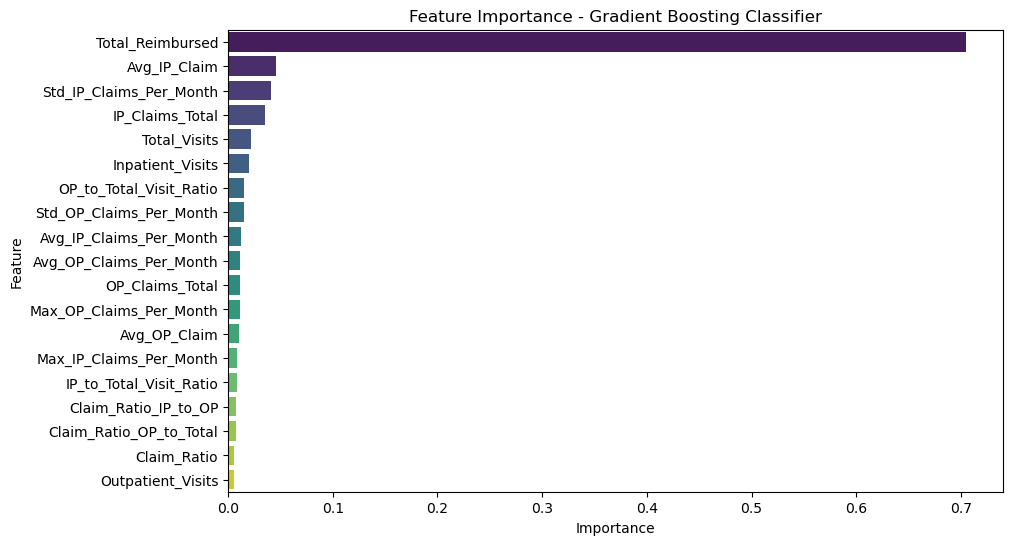

                    Feature  Importance
2          Total_Reimbursed    0.704753
8              Avg_IP_Claim    0.045558
15  Std_IP_Claims_Per_Month    0.041126
0           IP_Claims_Total    0.035236
10             Total_Visits    0.021466
4          Inpatient_Visits    0.020399
12  OP_to_Total_Visit_Ratio    0.015643
18  Std_OP_Claims_Per_Month    0.014784
13  Avg_IP_Claims_Per_Month    0.012122
16  Avg_OP_Claims_Per_Month    0.011546
1           OP_Claims_Total    0.011509
17  Max_OP_Claims_Per_Month    0.011350
9              Avg_OP_Claim    0.010066
14  Max_IP_Claims_Per_Month    0.008798
11  IP_to_Total_Visit_Ratio    0.008384
6      Claim_Ratio_IP_to_OP    0.007818
7   Claim_Ratio_OP_to_Total    0.007535
3               Claim_Ratio    0.005975
5         Outpatient_Visits    0.005930


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model on the enhanced dataset
df = pd.read_csv('final_provider_dataset_enhanced.csv')
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})
df = df.drop(columns=['Provider'])

X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Extract feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': gbc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')
plt.title("Feature Importance - Gradient Boosting Classifier")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Display top features
print(feature_importance.head(35))  # Print top 35 features

In [24]:
pip install xgboost lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 163.4 kB/s eta 0:00:09
   - -------------------------------------- 0.1/1.5 MB 233.8 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.5 MB 233.8 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.5 MB 206.9 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.5 MB 206.9 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.5 MB 206.9 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1

C:\Users\Chloe DeRouen\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:37:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 405, number of negative: 3923
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4172
[LightGBM] [Info] Number of data points in the train set: 4328, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.093577 -> initscore=-2.270725
[LightGBM] [Info] Start training from score -2.270725
🔹 **Model Performance Comparison**
XGBoost -> Accuracy: 0.9362, Precision: 0.6818, Recall: 0.5941, F1 Score: 0.6349
LightGBM -> Accuracy: 0.9344, Precision: 0.6667, Recall: 0.5941, F1 Score: 0.6283


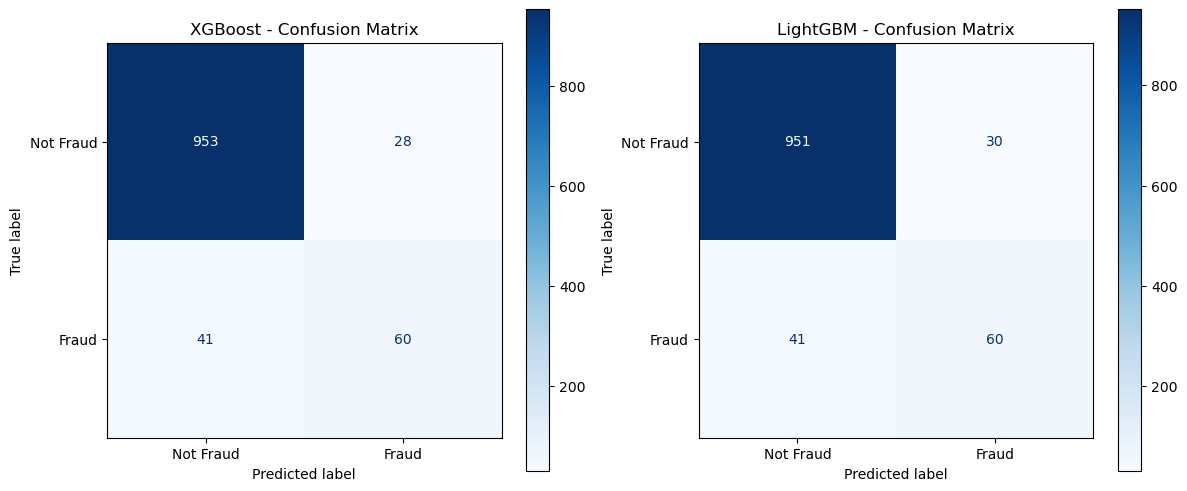

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the enhanced dataset
df = pd.read_csv('final_provider_dataset_enhanced.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (optional for tree-based models but can help performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 🔹 Train XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

### 🔹 Train LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predict using LightGBM
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate LightGBM
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)

### 🔹 Print Model Performance Comparison
print("🔹 **Model Performance Comparison**")
print(f"XGBoost -> Accuracy: {accuracy_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1 Score: {f1_xgb:.4f}")
print(f"LightGBM -> Accuracy: {accuracy_lgbm:.4f}, Precision: {precision_lgbm:.4f}, Recall: {recall_lgbm:.4f}, F1 Score: {f1_lgbm:.4f}")

### 🔹 Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Not Fraud', 'Fraud'])
disp_xgb.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title("XGBoost - Confusion Matrix")

# LightGBM Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
disp_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm, display_labels=['Not Fraud', 'Fraud'])
disp_lgbm.plot(ax=axes[1], cmap='Blues', values_format='d')
axes[1].set_title("LightGBM - Confusion Matrix")

plt.show()


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('final_provider_dataset_enhanced.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (optional for tree-based models but can improve performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size
    'max_depth': [3, 5, 7],  # Tree depth
    'subsample': [0.7, 1.0],  # Portion of data used per tree
    'colsample_bytree': [0.7, 1.0]  # Feature sampling per tree
}

# 🔹 Initialize XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# 🔹 Perform GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 🔹 Get best parameters
best_params = grid_search.best_params_
print("🔹 **Best Parameters:**", best_params)

# 🔹 Train XGBoost with best parameters
best_xgb = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_xgb.fit(X_train, y_train)

# 🔹 Predictions
y_pred = best_xgb.predict(X_test)

# 🔹 Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 🔹 Print Performance Metrics
print(f"📌 **Tuned XGBoost Performance**")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\Chloe DeRouen\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:46:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 **Best Parameters:** {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}
📌 **Tuned XGBoost Performance**
Accuracy: 0.9362
Precision: 0.6778
Recall: 0.6040
F1 Score: 0.6387


Text(0.5, 1.0, 'XGBoost - Confusion Matrix')

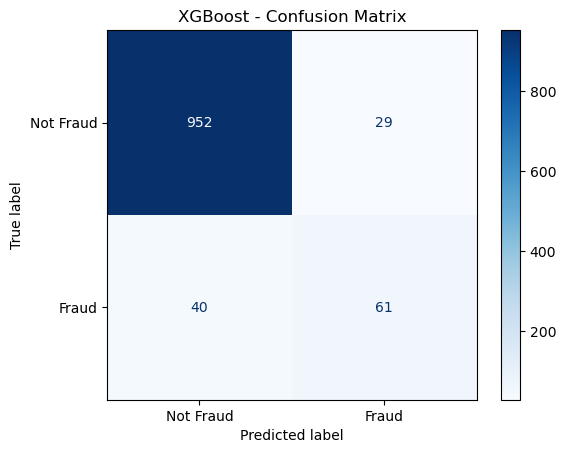

In [40]:
# 🔹 Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("XGBoost - Confusion Matrix")
plt.show()

C:\Users\Chloe DeRouen\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:49:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_21804\2859975934.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')


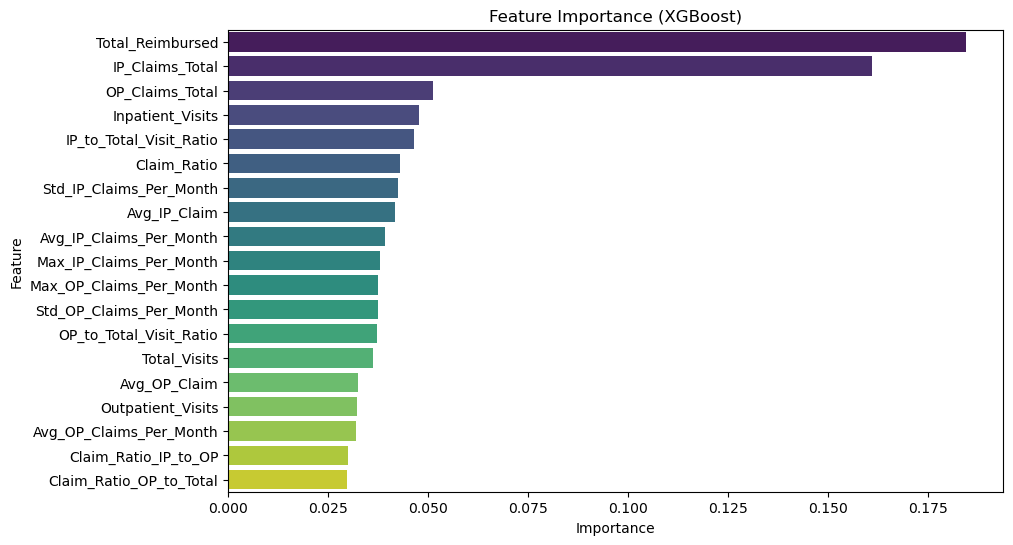

C:\Users\Chloe DeRouen\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:49:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 **XGBoost Performance After Feature Selection**
Accuracy: 0.9372
Precision: 0.6897
Recall: 0.5941
F1 Score: 0.6383


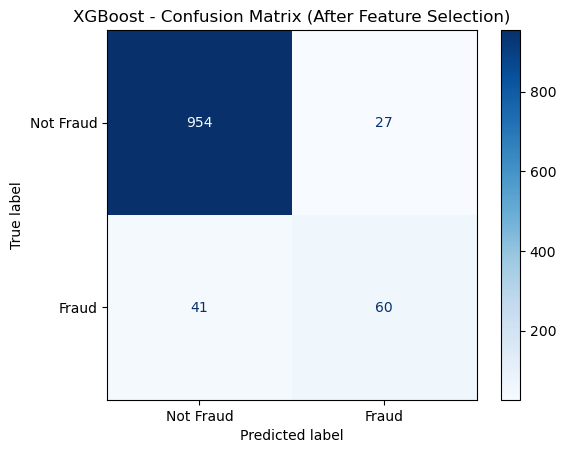

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('final_provider_dataset_enhanced.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train XGBoost with best parameters
best_xgb = XGBClassifier(
    colsample_bytree=0.7,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=100,
    subsample=0.7,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

# 🔹 Get feature importance
feature_importance = pd.DataFrame({
    'Feature': df.drop(columns=['PotentialFraud']).columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 🔹 Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 🔹 Drop least important features (Bottom 3)
low_importance_features = feature_importance.tail(3)['Feature'].tolist()
X = X.drop(columns=low_importance_features)

# 🔹 Re-train XGBoost after feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

# 🔹 Evaluate model after feature selection
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 🔹 Print Performance Metrics
print(f"📌 **XGBoost Performance After Feature Selection**")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 🔹 Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("XGBoost - Confusion Matrix (After Feature Selection)")
plt.show()


C:\Users\Chloe DeRouen\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:51:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Chloe DeRouen\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:51:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 405, number of negative: 3923
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4172
[LightGBM] [Info] Number of data points in the train set: 4328, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.093577 -> initscore=-2.270725
[LightGBM] [Info] Start training from score -2.270725
[LightGBM] [Info] Number of positive: 324, number of negative: 3138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4134
[LightGBM] [Info] Number of data points in the train set: 3462, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.093588 -> initscore=-2.270597
[LightGBM] [Info] Start training from score -2.270597
[LightGBM] [Info] Nu

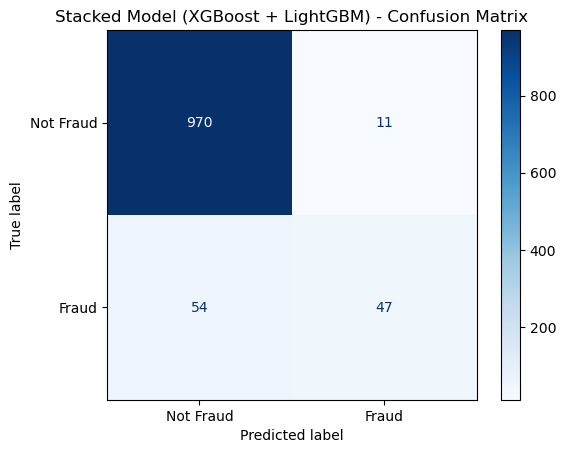

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('final_provider_dataset_enhanced.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models
xgb_model = XGBClassifier(
    colsample_bytree=0.7,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=100,
    subsample=0.7,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

lgbm_model = LGBMClassifier(
    num_leaves=31,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42
)

# Define stacking classifier with XGBoost & LightGBM
stacked_model = StackingClassifier(
    estimators=[('xgb', xgb_model), ('lgbm', lgbm_model)],
    final_estimator=XGBClassifier(n_estimators=50, learning_rate=0.1, random_state=42),
    stack_method='auto'
)

# Train stacked model
stacked_model.fit(X_train, y_train)

# Make predictions
y_pred = stacked_model.predict(X_test)

# Evaluate stacked model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print(f"📌 **Stacked Model (XGBoost + LightGBM) Performance**")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Stacked Model (XGBoost + LightGBM) - Confusion Matrix")
plt.show()


📌 **Threshold: 0.4**
Accuracy: 0.9316
Precision: 0.6452
Recall: 0.5941
F1 Score: 0.6186
----------------------------------------


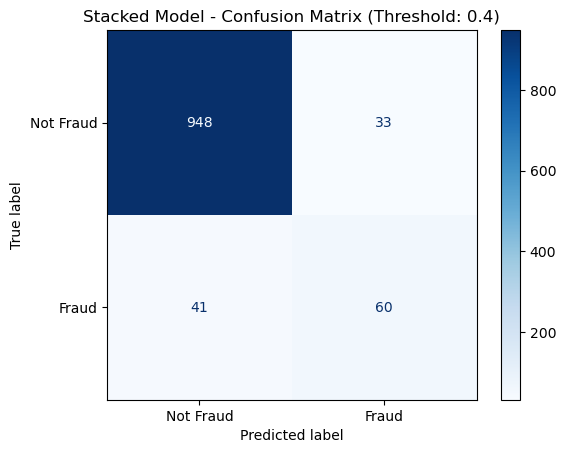

📌 **Threshold: 0.35**
Accuracy: 0.9214
Precision: 0.5755
Recall: 0.6040
F1 Score: 0.5894
----------------------------------------


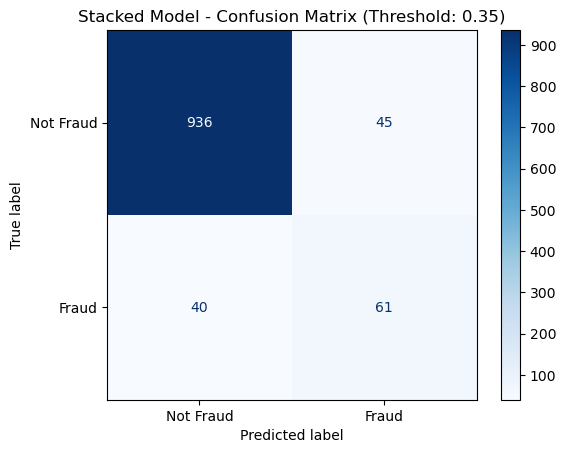

In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset and model predictions (assuming X_test and y_test exist)
y_proba = stacked_model.predict_proba(X_test)[:, 1]  # Get fraud probability scores

# Try different thresholds
for threshold in [0.4, 0.35]:
    y_pred = (y_proba >= threshold).astype(int)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"📌 **Threshold: {threshold}**")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Stacked Model - Confusion Matrix (Threshold: {threshold})")
    plt.show()


[LightGBM] [Info] Number of positive: 405, number of negative: 3923
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4172
[LightGBM] [Info] Number of data points in the train set: 4328, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

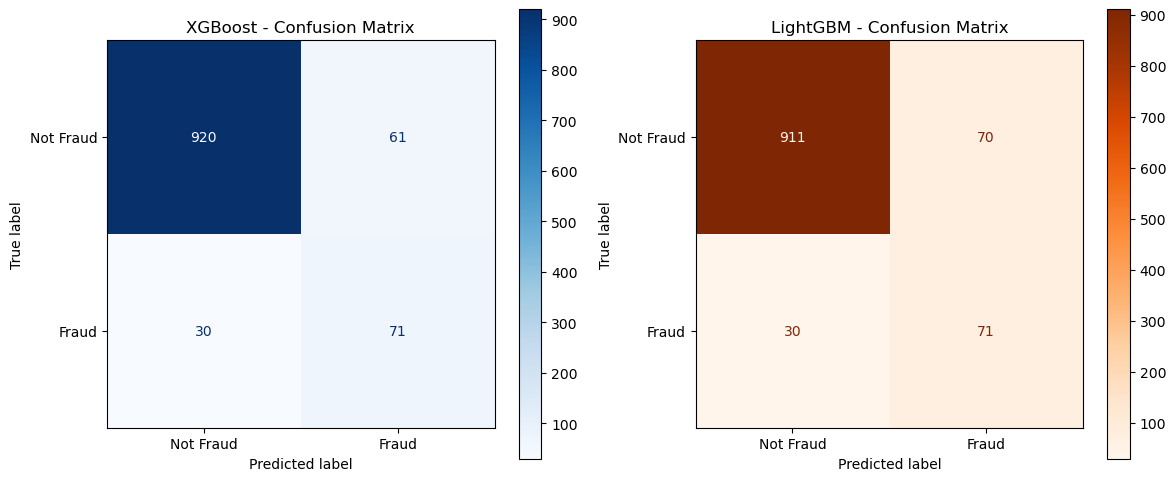

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final_provider_dataset_enhanced.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Compute class weights
num_negative = (y == 0).sum()
num_positive = (y == 1).sum()
scale_pos_weight = num_negative / num_positive  # Used for XGBoost

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train XGBoost with class weighting
xgb_model = xgb.XGBClassifier(
    random_state=42,
    colsample_bytree=0.7,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=100,
    subsample=0.7,
    scale_pos_weight=scale_pos_weight  # Balancing class weights
)
xgb_model.fit(X_train, y_train)

# Train LightGBM with class weighting
lgb_model = lgb.LGBMClassifier(
    random_state=42,
    colsample_bytree=0.7,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=100,
    subsample=0.7,
    class_weight='balanced'  # Balancing class weights
)
lgb_model.fit(X_train, y_train)

# Predict probabilities for both models
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Apply new threshold (0.4)
threshold = 0.4
y_pred_xgb = (y_proba_xgb >= threshold).astype(int)
y_pred_lgb = (y_proba_lgb >= threshold).astype(int)

# Evaluate XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"📌 **XGBoost with Class Weighting**")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print("-" * 40)

# Evaluate LightGBM
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

print(f"📌 **LightGBM with Class Weighting**")
print(f"Accuracy: {accuracy_lgb:.4f}")
print(f"Precision: {precision_lgb:.4f}")
print(f"Recall: {recall_lgb:.4f}")
print(f"F1 Score: {f1_lgb:.4f}")

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Not Fraud', 'Fraud'])
disp_xgb.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title("XGBoost - Confusion Matrix")

cm_lgb = confusion_matrix(y_test, y_pred_lgb)
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=['Not Fraud', 'Fraud'])
disp_lgb.plot(ax=axes[1], cmap='Oranges', values_format='d')
axes[1].set_title("LightGBM - Confusion Matrix")

plt.tight_layout()
plt.show()


[LightGBM] [Info] Number of positive: 405, number of negative: 3923
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4172
[LightGBM] [Info] Number of data points in the train set: 4328, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

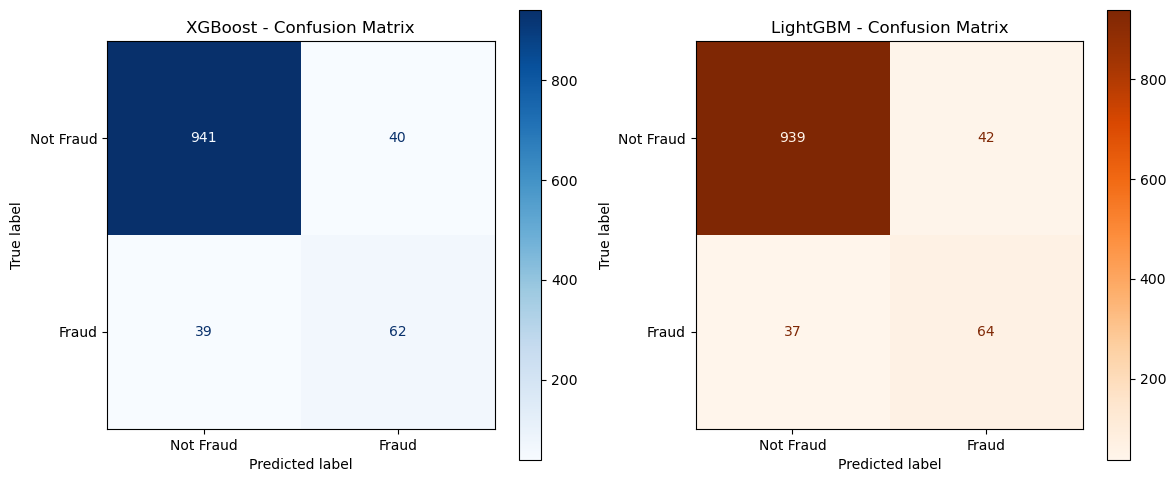

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final_provider_dataset_enhanced.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Compute class weights
num_negative = (y == 0).sum()
num_positive = (y == 1).sum()
scale_pos_weight = num_negative / num_positive  # Used for XGBoost

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train XGBoost with class weighting
xgb_model = xgb.XGBClassifier(
    random_state=42,
    colsample_bytree=0.7,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=100,
    subsample=0.7,
    scale_pos_weight=scale_pos_weight  # Balancing class weights
)
xgb_model.fit(X_train, y_train)

# Train LightGBM with class weighting
lgb_model = lgb.LGBMClassifier(
    random_state=42,
    colsample_bytree=0.7,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=100,
    subsample=0.7,
    class_weight='balanced'  # Balancing class weights
)
lgb_model.fit(X_train, y_train)

# Predict probabilities for both models
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Apply new threshold (0.45)
threshold = 0.65
y_pred_xgb = (y_proba_xgb >= threshold).astype(int)
y_pred_lgb = (y_proba_lgb >= threshold).astype(int)

# Evaluate XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"📌 **XGBoost with Class Weighting**")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print("-" * 40)

# Evaluate LightGBM
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

print(f"📌 **LightGBM with Class Weighting**")
print(f"Accuracy: {accuracy_lgb:.4f}")
print(f"Precision: {precision_lgb:.4f}")
print(f"Recall: {recall_lgb:.4f}")
print(f"F1 Score: {f1_lgb:.4f}")

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Not Fraud', 'Fraud'])
disp_xgb.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title("XGBoost - Confusion Matrix")

cm_lgb = confusion_matrix(y_test, y_pred_lgb)
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=['Not Fraud', 'Fraud'])
disp_lgb.plot(ax=axes[1], cmap='Oranges', values_format='d')
axes[1].set_title("LightGBM - Confusion Matrix")

plt.tight_layout()
plt.show()


[LightGBM] [Info] Number of positive: 405, number of negative: 3923
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4168
[LightGBM] [Info] Number of data points in the train set: 4328, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.093577 -> initscore=-2.270725
[LightGBM] [Info] Start training from score -2.270725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_15384\3387570752.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_feature_importance['Importance'], y=xgb_feature_importance['Feature'], palette='viridis')


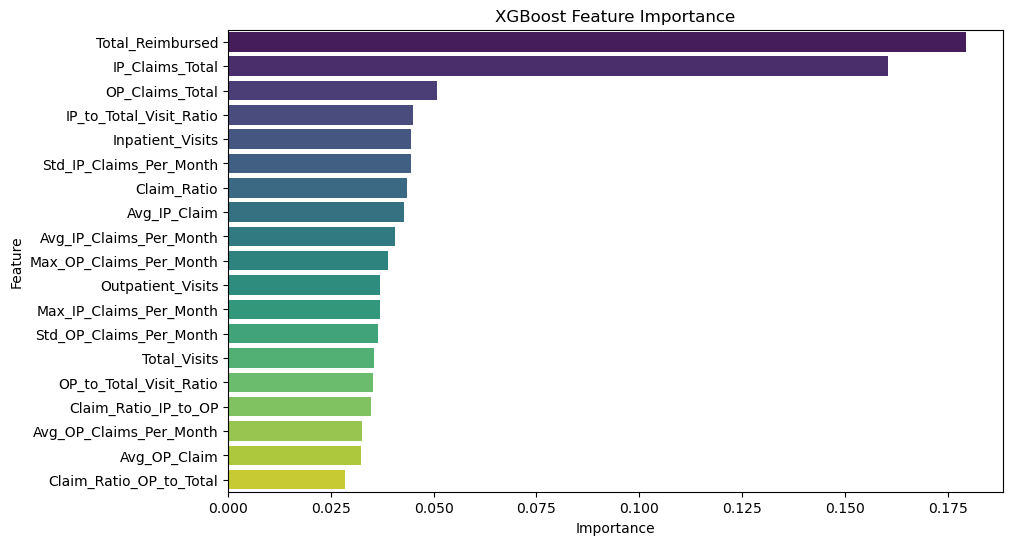

C:\Users\Chloe DeRouen\AppData\Local\Temp\ipykernel_15384\3387570752.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lgb_feature_importance['Importance'], y=lgb_feature_importance['Feature'], palette='magma')


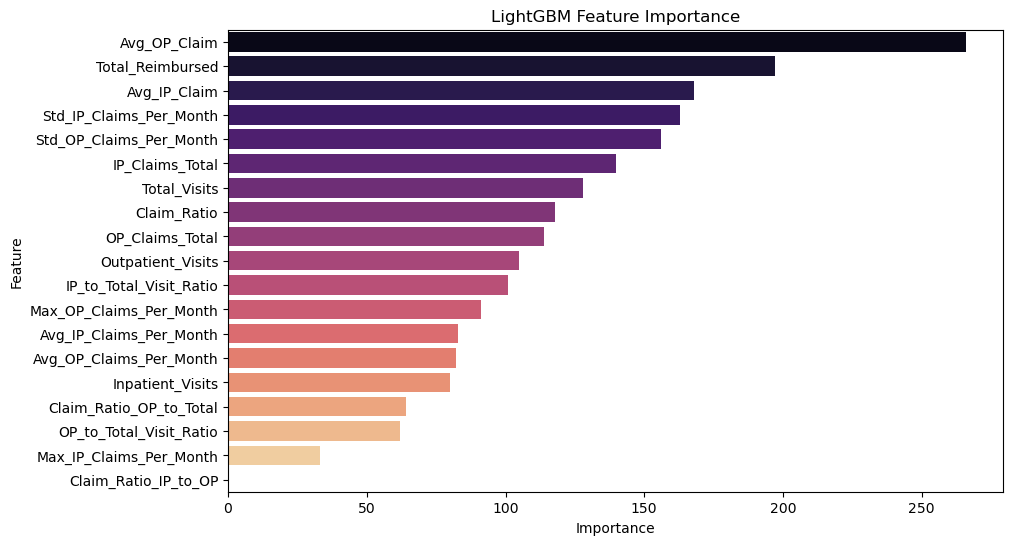

[LightGBM] [Info] Number of positive: 405, number of negative: 3923
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4168
[LightGBM] [Info] Number of data points in the train set: 4328, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.093577 -> initscore=-2.270725
[LightGBM] [Info] Start training from score -2.270725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the enhanced dataset
df = pd.read_csv('final_provider_dataset_enhanced.csv')

# Convert PotentialFraud to binary (1 = Fraud, 0 = Not Fraud)
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df = df.drop(columns=['Provider'])

# Define features (X) and target (y)
X = df.drop(columns=['PotentialFraud'])
y = df['PotentialFraud']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (not required for tree-based models, but useful for comparison)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.7, random_state=42
)
xgb_model.fit(X_train, y_train)

# Train LightGBM Model
lgb_model = lgb.LGBMClassifier(
    boosting_type='gbdt', learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.7, random_state=42
)
lgb_model.fit(X_train, y_train)

# 📌 Feature Importance Plot for XGBoost
xgb_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
xgb_feature_importance = xgb_feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_feature_importance['Importance'], y=xgb_feature_importance['Feature'], palette='viridis')
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 📌 Feature Importance Plot for LightGBM
lgb_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': lgb_model.feature_importances_})
lgb_feature_importance = lgb_feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=lgb_feature_importance['Importance'], y=lgb_feature_importance['Feature'], palette='magma')
plt.title("LightGBM Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 📌 Cross-Validation (Accuracy Score)
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
lgb_cv_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='accuracy')

print(f"XGBoost 5-Fold Cross-Validation Accuracy: {np.mean(xgb_cv_scores):.4f} ± {np.std(xgb_cv_scores):.4f}")
print(f"LightGBM 5-Fold Cross-Validation Accuracy: {np.mean(lgb_cv_scores):.4f} ± {np.std(lgb_cv_scores):.4f}")
